In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from imblearn.over_sampling import SMOTE
from warnings import filterwarnings
from sklearn.metrics import classification_report
filterwarnings("ignore")

In [38]:
df = pd.read_csv("Heart Disease Dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [39]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [40]:
print(df.duplicated().sum())
df = df.drop_duplicates()

1


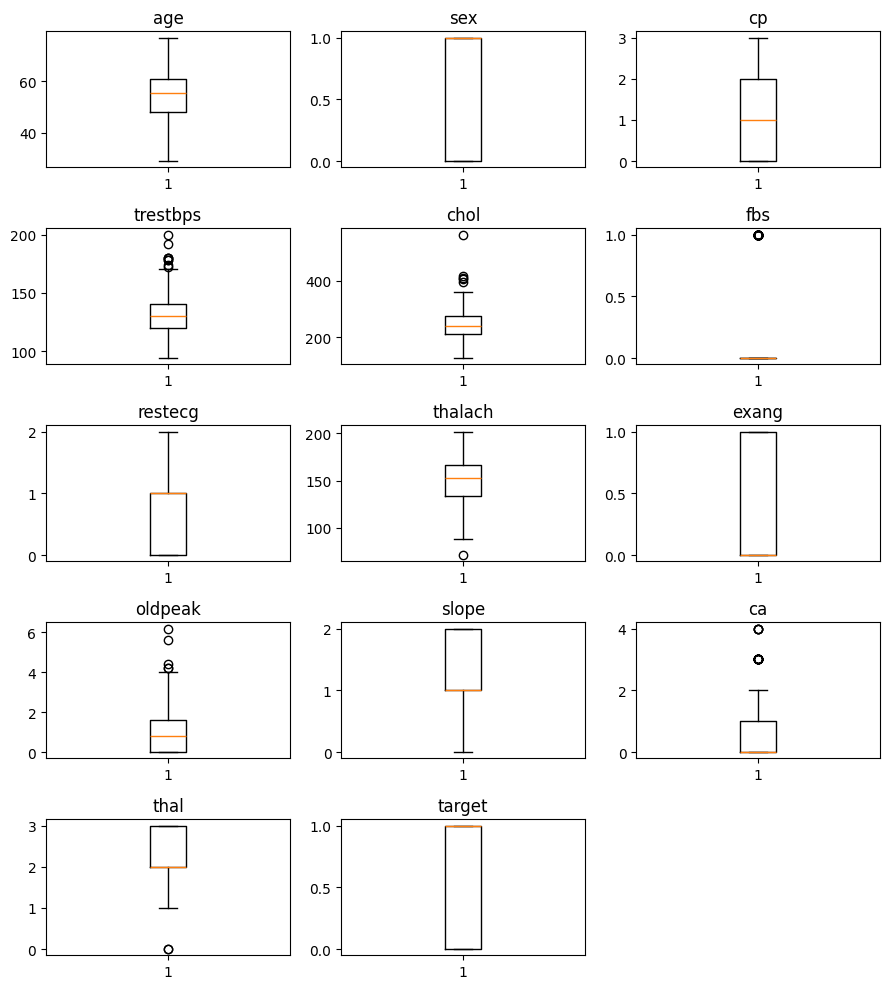

In [41]:
import math

n = len(df.columns)
n_cols = 3
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(n_cols * 3, n_rows *2))
for i, col in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

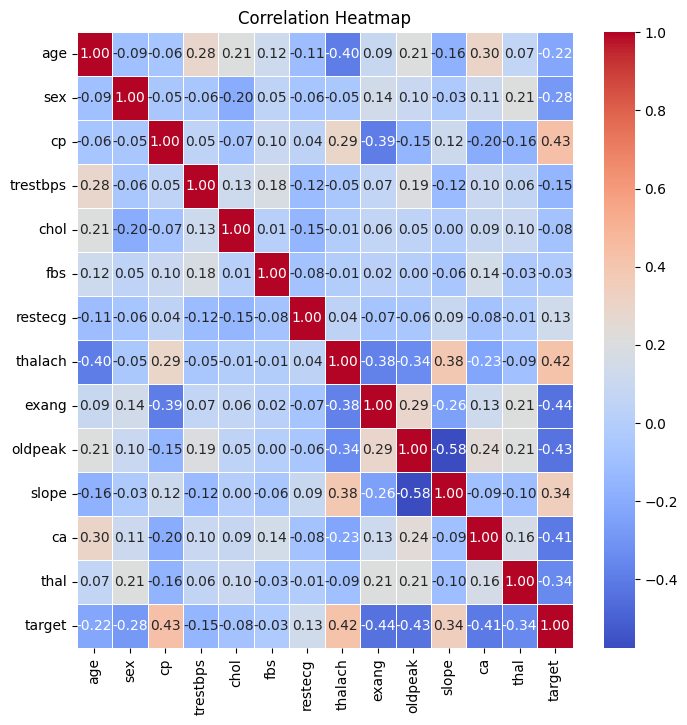

In [42]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [43]:
X = df.drop("target", axis=1)
y = df["target"]

In [44]:
percentages = y.value_counts() / df.shape[0] * 100
print(percentages.round(2))

y.value_counts()

target
1    54.3
0    45.7
Name: count, dtype: float64


target
1    164
0    138
Name: count, dtype: int64

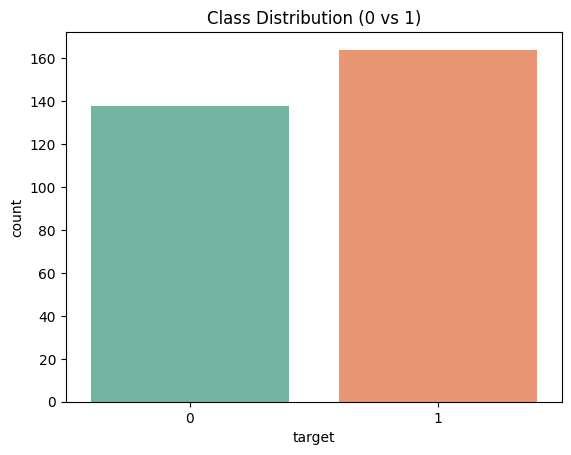

In [45]:
sns.countplot(x=y , palette="Set2")
plt.title("Class Distribution (0 vs 1)")
plt.show()

In [46]:
smote = SMOTE(random_state=42,
              sampling_strategy='auto')
X , y = smote.fit_resample(X, y)

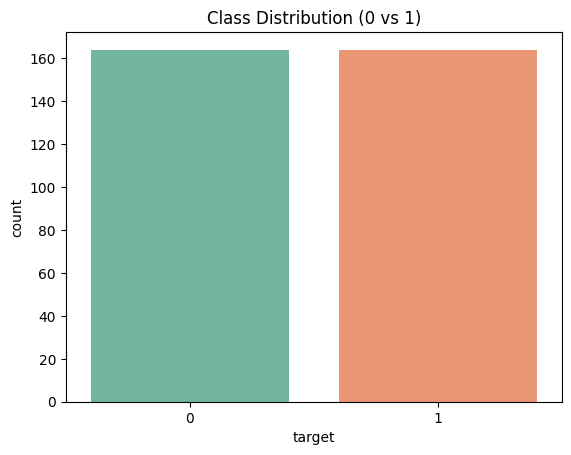

In [47]:
sns.countplot(x=y , palette="Set2")
plt.title("Class Distribution (0 vs 1)")
plt.show()

In [48]:
X.var()

age           79.951359
sex            0.217200
cp             1.041210
trestbps     309.602139
chol        2636.831469
fbs            0.123135
restecg        0.275145
thalach      535.919743
exang          0.217200
oldpeak        1.334500
slope          0.383074
ca             0.973670
thal           0.380165
dtype: float64

In [49]:
Features_name = X.columns.tolist()

In [50]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.72916667, 0.        , 0.33333333, ..., 0.5       , 0.        ,
        0.66666667],
       [0.6875    , 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.625     , 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.79      0.79      0.79        34

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66



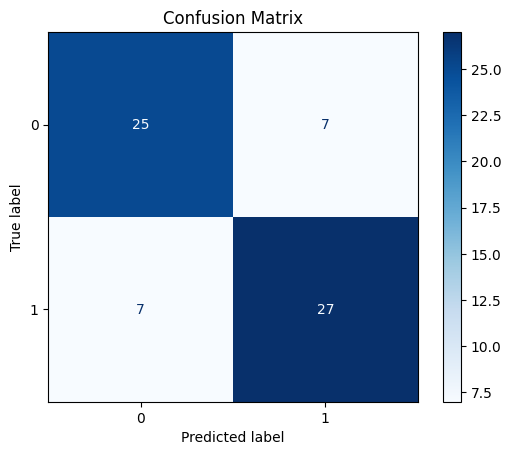

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test ,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [55]:
import pickle
save_data = {
    "model": knn,
    "scaler": scaler,
    "features": Features_name
}

with open("heart_model.pkl", "wb") as f:
    pickle.dump(save_data, f)

print("🎯 Model saved as heart_model.pkl")

🎯 Model saved as heart_model.pkl


# Try Model Here = *https://knnheartdisease-lmzttuuxvhcq6dszmwxgcq.streamlit.app/*